## Polymers

Many of the most important molecules in biology are polymers:
 * single stranded RNA and DNA
 * double stranded DNA
 * proteins
 * cyctoskeletal filaments
 
The microscopic properties of these different polymers depend on their molecular structure, but on larger scales their behavior is governed by a few mesoscopic parameters such as stiffness, charge, self-interaction, and cross-linking.

![image.png](figures/colorful_cytoskeleton.png)

The cytosceleton provides structure and rigity to the cell. Actin filaments are shown in green, tubulin in blue, DNA in red.

![image.png](figures/ecoli_genome_splash.png)

DNA from a lysed E coli (source: http://i.imgur.com/kaFF3.jpg)

#### Polymers as information carriers

 * DNA and RNA are heteropolymers of nucleotide (pairs)
 * stability and accessibility
 * copying by templating
 

#### Proteins are polymers

 * Polypeptides are heteropolymers of amino acids
 * Amino-acid sequence encodes 3D structure and function
 

#### Polymers as structural elements
 * actin filaments
 * microtubuli
 * intermediate filaments
 * these are homopolymers (units are globular proteins, sometimes heterodimers)
 * structural function at different scales 

## Simple models of polymers

 * polymers have universal properties independent of what they are made of (much like liquids: oil, gasoline, water are very different at the molecular level but are share properties of liquids).
 * the universal properties can be understood using simple models. 
 * separate models for stiff and floppy polymers

![image.png](figures/flexible_polymer_models.png)

## Freely jointed chain model

 * Segments of fixed length $d$ with random direction (ignores the fact that the polymer can't self-overlap). 
 * Same as a random walk in three dimensions
 
![image.png](figures/freely_jointed_chain.png)

Position of monomer $i$ is 
$$
\vec{r}_i = \vec{r}_0 + d\sum_{j=1}^i \vec{e}_j
$$



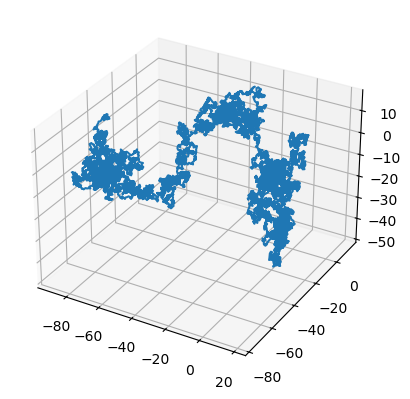

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# return a vector on the sphere with angles theta (polar) and phi (azimuth)
# see https://en.wikipedia.org/wiki/Spherical_coordinate_system
def unit_vector(phi, theta):
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    return (x,y,z)    

# pick a random vector such that each direction is equally likely
def random_unit_vector():
    phi = np.random.uniform(0,np.pi*2)  # any azimuth is equally likely
    costheta = np.random.uniform(-1,1)  # theta around pi/2 are more likely than 0 or pi
    theta = np.arccos(costheta)
    return unit_vector(phi, theta)

def freely_jointed_chain(N, d):
    # initial position
    positions = [ np.array([0,0,0]) ]
    for n in range(N):
        # increment position 
        positions.append(positions[-1] + d*random_unit_vector())
    return np.array(positions)

d = 1
N = 10000
positions = freely_jointed_chain(N,d)

# plot the trajectory
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(positions[:,0], positions[:,1], positions[:,2])


#### End-to-end distance
The end-to-end vector of a freely-jointed chain is
$$
\vec{R} = d\sum_{i=1}^N \vec{e}_i
$$
is on average zero, but the average squared end-to-end distance is a meaningful quantity that describes the extension of the polymer.
$$
\langle \vec{R}^2 \rangle = d^2\langle\sum_{i}^N \vec{e}_i\sum_{j}^N \vec{e}_j\rangle = d^2\sum_{i,j=1}^N \langle\vec{e}_i\vec{e}_j\rangle 
$$

The terms $\langle\vec{e}_i\vec{e}_j\rangle$ are the average length of the projection of vector $i$ onto vector $j$.
Now split the sum into parts with $i=j$ and $i\neq j$ and observe that $\langle\vec{e}_i\vec{e}_j\rangle$ equals 1 for $i=j$ and 0 for $i\neq j$:
$$
\langle \vec{R}^2 \rangle = d^2\sum_{i=1}^N \langle \vec{e}_i^2 \rangle + d^2\sum_{i,j=1, i\neq j}^N \langle \vec{e}_i\vec{e}_j \rangle = d^2N
$$
Hence as with the random walks and diffusion, we find that the end-to-end distance grows as the square-root of the number of monomers. 

#### Radius of gyration
A second common summary statistic of the extension of a polymer is the radius of gyration, which measure the average squared distance of monomers from the center of mass of the polymer $\vec{R}_{cm} = \frac{1}{N}\sum_{i=1}^N \vec{r}_i$:
$$
R_g^2 = \frac{1}{N}\sum_{i=1}^N (\vec{r}_i - \vec{R}_{cm})^2 = \frac{d^2N}{6}
$$
The calculation leading to this result is a little lengthy, but straightforward. 

### Excluded volume effects
Our model above ignored the fact that two monomers can not occupy the same part of space. However, it turns out that this simplification doesn't affect the results much. This can be shown by rather complicated derivations, but is also intuitive from the simulations above. While such excluded volume might affect the local structure of the polymer configuration, the overall structure would not be affected much by such constraints. 

However, in one or two dimensional systems excluded volume effects are much more important (obvious in one dimension -- you can never go back...). 


### Large scale chromatin structure
Despite the simplicity of this model, the basic dependence of the end-to-end distance on the length of the polymer is observed in biology.
[Engh et al.](https://science.sciencemag.org/content/257/5075/1410) measured the distance between two position on the human chromosome 4 labeled with fluorescent probes. 
These measurements were repeated for many pairs of positions varying between $10^5$ and $4\times 10^6$ base pairs. 
When plotting the mean-squared marker-to-marker distance against they separation on the chromosome, [Engh et al.](https://science.sciencemag.org/content/257/5075/1410) observed a linear relationship consistent a freely jointed chain model.

![image.png](figures/Engh_etal_chromatin.png)

We will revisit this data in an exercise and in following lectures. 

## Dig deeper
 * Watch Julie Theriot's videos on the dynamic [cytoskeleton](https://www.ibiology.org/cell-biology/cell-motility/) 
 * calculate the radius of gyration analytically (confirm the above formula)
 * calculate the radius of gyration numerically for a polymer chain and compare the analytical expectation
 * [Advanced] Calculate the [tensor of inertia](https://en.wikipedia.org/wiki/Moment_of_inertia#Inertia_tensor) for polymer configurations.
   - What is the interpretation of the eigenvalues of this tensor? 
   - What is the typical ratio of the biggest and second biggest eigenvalue? 
   - How is this ratio related to the shape of the polymer configuration?